<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 15px 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0; font-weight: bold; font-family: Arial, sans-serif;">PREDICTING IMDB RATINGS BASED ON THEIR PLOT SUMMARY AND IMDB DATA

</h1>
  <hr style="border: 0; border-top: 2px solid black; margin: 10px auto; width: 85%;">
</div>


In [255]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Regressors = {}
Hyperparams = {}

<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">INTRODUCTION</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Producing a movie involves significant financial investment, often reaching hundreds of millions of US dollars. Recent popular films such as Avengers: Endgame had estimated budgets of up to $356,000,000 <a href="https://www.imdb.com/title/tt4154796">[1]</a>. Given such high costs, there is a significant risk associated with financing these productions. As such, there is considerable value in developing a model which can mitigate this risk. A model that can predict a film project’s performance using pre-production features could help production companies make safer decisions regarding the films they finance. Such a model could also help filmmakers get immediate feedback during their ideation phase.

---

<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">DATA OVERVIEW</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The primary dataset used in this study consists of Film data from over 3000 movies from 2014-2024. A review cap of 1000 is imposed to screen for very niche films. For each film, the following data were collected:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-0pky"><span style="font-weight:bold">Feature</span></th>
    <th class="tg-0pky"><span style="font-weight:bold">Description</span></th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-0pky">Movie Title</td>
    <td class="tg-0pky">Movie title, as listed in IMDB</td>
  </tr>
  <tr>
    <td class="tg-0pky">Plot Summary</td>
    <td class="tg-0pky">A concatenation of all the plot summaries available for a film</td>
  </tr>
  <tr>
    <td class="tg-0pky">Ratings</td>
    <td class="tg-0pky">IMDB rating</td>
  </tr>
  <tr>
    <td class="tg-0lax">Budget</td>
    <td class="tg-0lax">Budget as listed in IMDB</td>
  </tr>
  <tr>
    <td class="tg-0lax">Runtime</td>
    <td class="tg-0lax">Movie Runtime in minutes</td>
  </tr>
  <tr>
    <td class="tg-0lax">Cast</td>
    <td class="tg-0lax">Comma-separated list of Actors</td>
  </tr>
  <tr>
    <td class="tg-0pky">Producers</td>
    <td class="tg-0pky">Comma-separated list of Producers</td>
  </tr>
  <tr>
    <td class="tg-0pky">Directors</td>
    <td class="tg-0pky">Comma-separated list of Directors</td>
  </tr>
  <tr>
    <td class="tg-0lax">Distributors</td>
    <td class="tg-0lax">Comma-separated list of Distributors</td>
  </tr>
  <tr>
    <td class="tg-0lax">Genre</td>
    <td class="tg-0lax">Comma-separated list of Genres</td>
  </tr>
</tbody></table>

---

<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">METHODOLOGY OVERVIEW</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Movies are sampled from the IMDb website and collected via web scraping. We collect the features mentioned above. The test and nontest split is done this early in the process to avoid any leakage resulting from any data transformation. Data transformations (e.g., PCA or TF-IDF) are generally fitted using the nontest data.

The Plot Summary is vectorized using TF-IDF. PCA is then applied to these token features to reduce the dimensionality of the data and uncover latent features. Then, the following EDA plots would be used to uncover possible data errors, distribution trends, and outliers:
- Word Clouds for each PC
- Distribution Plots (histogram or violin) for Ratings and Budget
- Biplots for the PC pairs
- Themes will be extracted by clustering on the PCA space
- Bivariate for Ratings and Budget

Various classification models are then trained on these features. To turn the target feature into a categorical variable, movies are classified into ‘good’ (above median) or ‘bad’ (below median). For the analysis of the models, the following will be used:
- Feature Weights Graph
- Performance Metrics
- Accuracy, Recall, and Precision
- Confusion Matrices
The final model will then be chosen based on the validation performance metrics.


---

<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">RESULTS</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Data Collection
The following notebook runs all the code related to the data collection:

In [256]:
%run Preprocessing.ipynb

DONE compiling


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The code uses IMDB's advanced search page to compile a list of valid movie IDS. The following code controls for the parameters of the search:
```python
        params = {
            'title_type': 'feature',
            'num_votes': 1000,
            'primary_language': 'en',
            'sort': 'year,asc',
            'release_date': f"{start_date},{end_date}"
        }
```
The search was distributed over five notebooks to make the code robust to errors. Each notebook was set to search for 2 years, for 10 years worth of movies. This amounts to over 3000 data points and 12 columns (not counting the Unnamed Columns). These separate searches are then compiled into a single CSV: raw_complete.csv

In [257]:
data = pd.read_csv('raw_complete.csv')
data

,Unnamed: 0.1,Unnamed: 0,Title,Year,Plot,Rating,Budget,Cast,MPA Rating,Directors,Distributors,Producers,Genre,Runtime in Minutes
0,0,0,1. Whiplash,2014,A promising young drummer enrolls at a cut-thr...,8.5,"$3,300,000 (estimated)","Miles Teller,J.K. Simmons,Paul Reiser,Melissa ...",TV-14,Damien Chazelle,"Sony Pictures Classics,Sony Pictures Worldwide...","Bold Films,Blumhouse Productions,Right of Way ...","Drama,Music",106
1,1,1,2. RoboCop,2014,"In 2028 Detroit, when Alex Murphy, a loving hu...",6.1,"$100,000,000 (estimated)","Joel Kinnaman,Gary Oldman,Michael Keaton,Abbie...",TV-14,José Padilha,"Columbia Pictures,ACME,ACME,ACME,B&H Film Dist...","Metro-Goldwyn-Mayer (MGM),Columbia Pictures,St...","Action,Crime,Sci-Fi,Thriller",117
2,2,2,3. The Babadook,2014,A single mother and her child fall into a deep...,6.8,"$2,000,000 (estimated)","Essie Davis,Noah Wiseman,Hayley McElhinney,Dan...",Not,Jennifer Kent,"Capelight Pictures,Cinecolor Films,Feelgood En...","Screen Australia,Causeway Films,The South Aust...","Drama,Horror,Mystery",94
3,3,3,4. What We Do in the Shadows,2014,"Viago, Deacon, and Vladislav are vampires who ...",7.6,"$1,600,000 (estimated)","Jemaine Clement,Taika Waititi,Jonny Brugh,Cori...",R,"Jemaine Clement,Taika Waititi","Benuca Films,Cinetren,Festival Films / Yedra F...","Unison Films,Defender Films,Park Road Post Pro...","Comedy,Horror",86
4,4,4,5. Boyhood,2014,"The life of Mason, from early childhood to his...",7.9,"$4,000,000 (estimated)","Ellar Coltrane,Patricia Arquette,Elijah Smith,...",TV-14,Richard Linklater,"Diaphana Distribution,IFC Films,Lumière,Lumièr...","IFC Productions,Detour Filmproduction",Drama,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,3239,872,10. F*** Marry Kill,2024,As a serial killer targets women on dating app...,5.3,NaN,"Lucy Hale,Virginia Gardner,Brooke Nevin,Samer ...",R,Laura Murphy,"Lionsgate,Amazon Prime Video,Apple TV+,SPI Int...","Buzzfeed Studios,BondIt Media Capital,CR8IV DNA","Comedy,Mystery,Romance,Thriller",97
3240,3240,873,11. Dirty Angels,2024,It centers on a group of female soldiers who d...,4.3,NaN,"Eva Green,Maria Bakalova,Ruby Rose,Reza Brojer...",R,Martin Campbell,"Gravel Road Distribution Group,Pioneer Films,T...","I Road Productions,Millennium Media,Nu Boyana ...","Action,Drama,Thriller,War",104
3241,3241,874,12. Mary,2024,"In this timeless coming-of-age story, Mary is ...",5.2,NaN,"Noa Cohen,Ido Tako,Ori Pfeffer,Hilla Vidor,Dud...",TV-14,D.J. Caruso,"Netflix,Arna Media,Atmosfera Kino,Svoe Kino,Ne...","Aloe Entertainment,Creativity Media,FitzHenry ...",Drama,112
3242,3242,875,14. Jamie Foxx: What Had Happened Was...,2024,A stand-up special with Jamie Foxx performing ...,5.8,NaN,"Jamie Foxx,Craig Brockman,Nisan Stewart,Bennet...",TV-MA,Hamish Hamilton,"Netflix,Netflix","Done and Dusted Productions,Foxxhole Productio...","Documentary,Comedy",68


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The extraneous, unnamed columns are dropped since they add nothing to the dataset.

In [258]:
data.drop(data.columns[[0,1]], axis=1, inplace=True)
data.head(2)

,Title,Year,Plot,Rating,Budget,Cast,MPA Rating,Directors,Distributors,Producers,Genre,Runtime in Minutes
0,1. Whiplash,2014,A promising young drummer enrolls at a cut-thr...,8.5,"$3,300,000 (estimated)","Miles Teller,J.K. Simmons,Paul Reiser,Melissa ...",TV-14,Damien Chazelle,"Sony Pictures Classics,Sony Pictures Worldwide...","Bold Films,Blumhouse Productions,Right of Way ...","Drama,Music",106
1,2. RoboCop,2014,"In 2028 Detroit, when Alex Murphy, a loving hu...",6.1,"$100,000,000 (estimated)","Joel Kinnaman,Gary Oldman,Michael Keaton,Abbie...",TV-14,José Padilha,"Columbia Pictures,ACME,ACME,ACME,B&H Film Dist...","Metro-Goldwyn-Mayer (MGM),Columbia Pictures,St...","Action,Crime,Sci-Fi,Thriller",117


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Data Split
To validate our data, we would need a test set. To ensure that this test set does not affect our model, we split this as early as possible. We allocate 20% of our dataset to the test set.

In [259]:
#Target Feature
target = ["Rating"]

#Make features everything but the target
features = list(data.columns)
features.remove(target[0])
feature_dict = {}


# Split data -> nontest & test
x_nontest, x_test, y_nontest, y_test = train_test_split(data[features], data[target], test_size=0.20, random_state=1337)
# Split nontest -> training & val
x_train, x_val, y_train, y_val = train_test_split(x_nontest, y_nontest, test_size=0.25, random_state=1337)
print(f'Train size: {len(x_train)}')
print(f'Test size: {len(x_test)}')
print(f'Val size: {len(x_val)}')

Train size: 1946
Test size: 649
Val size: 649


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Feature Extraction
To extract the budget feature, we use regex to get the numerical values. If the values are not in USD, they are set to 'N/A.'

In [260]:
x_train['Budget'] = x_train['Budget'].str.replace(',', '', regex=False).str.extract(r'\$(\d+)')
budget = pd.to_numeric(x_train['Budget'], errors='coerce')
x_train['Budget'] = budget

x_val['Budget'] = x_val['Budget'].str.replace(',', '', regex=False).str.extract(r'\$(\d+)')
budget = pd.to_numeric(x_val['Budget'], errors='coerce')
x_val['Budget'] = budget

x_test['Budget'] = x_test['Budget'].str.replace(',', '', regex=False).str.extract(r'\$(\d+)')
budget = pd.to_numeric(x_test['Budget'], errors='coerce')
x_test['Budget'] = budget

print(f'Dataset is now {len(x_test.columns)}-dimensional')
x_test.tail(2)

Dataset is now 11-dimensional


,Title,Year,Plot,Budget,Cast,MPA Rating,Directors,Distributors,Producers,Genre,Runtime in Minutes
593,23. Brothers of the Wind,2015,"In a world where it takes courage to fly, a yo...",NaN,"Jean Reno,Tobias Moretti,Manuel Camacho,Eva Ku...",TV-G,"Gerardo Olivares,Otmar Penker","Crystalsky Multimedia,Légende Distribution,War...","FilmVergnuegen,Terra Mater Factual Studios","Adventure,Drama,Family",98
2919,5. The Marvels,2023,Carol Danvers gets her powers entangled with t...,220000000.0,"Brie Larson,Teyonah Parris,Iman Vellani,Samuel...",PG-13,Nia DaCosta,"Walt Disney Studios Motion Pictures,Walt Disne...",Marvel Studios,"Action,Adventure,Sci-Fi",105


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

We then vectorize the plot summary using TF-IDF. We also ignore stop words to simplify our analysis, training, and interpretation. However, as we can see, this blows up the dimensions of the dataset.

In [261]:
vectorizer = TfidfVectorizer(token_pattern =r'[a-zA-Z]+', stop_words=list(sklearn.feature_extraction.text.ENGLISH_STOP_WORDS))
vectorizer.fit(x_train['Plot'])
tokens = vectorizer.get_feature_names_out()
feature_dict['tokens'] = list(tokens)

trainIDF = vectorizer.transform(x_train['Plot'])
x_train_wordvec = pd.DataFrame(trainIDF.toarray(), columns=tokens, index=x_train.index)
x_train_temp = pd.concat([x_train, x_train_wordvec], axis=1)

valIDF = vectorizer.transform(x_val['Plot'])
x_val_wordvec = pd.DataFrame(valIDF.toarray(), columns=tokens, index=x_val.index)
x_val_temp = pd.concat([x_val, x_val_wordvec], axis=1)

testIDF = vectorizer.transform(x_test['Plot'])
x_test_wordvec = pd.DataFrame(testIDF.toarray(), columns=tokens, index=x_test.index)
x_test_temp = pd.concat([x_test, x_test_wordvec], axis=1)

print(f'Dataset is now {len(x_test_temp.columns)}-dimensional')
x_test.head(2)

Dataset is now 23133-dimensional


,Title,Year,Plot,Budget,Cast,MPA Rating,Directors,Distributors,Producers,Genre,Runtime in Minutes
3208,1. A Complete Unknown,2024,"In 1961, an unknown 19-year-old Bob Dylan arri...",70000000.0,"Timothée Chalamet,Joe Tippett,Edward Norton,Er...",R,James Mangold,"Searchlight Pictures,Walt Disney Studios Motio...","Searchlight Pictures,The Picture Company,Range...","Biography,Drama,Music",141
2265,24. The Girl Who Got Away,2021,A female serial killer escapes from prison to ...,NaN,"Lexi Johnson,Chukwudi Iwuji,Kaye Tuckerman,Tim...",TV-MA,Michael Morrissey,Quiver Distribution,"Boy Wonder Productions,Lords Of Magic","Horror,Thriller",116


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

As with stop words, we can remove very infrequent words as it is unlikely that our model will learn anything from them. We can make the arbitrary decision to remove terms that appear in less than 0.1% of the corpus.

In [262]:
vectorizer = TfidfVectorizer(token_pattern =r'[a-zA-Z]+', min_df=0.001, stop_words=list(sklearn.feature_extraction.text.ENGLISH_STOP_WORDS))
vectorizer.fit(x_train['Plot'])
tokens = vectorizer.get_feature_names_out()
feature_dict['tokens'] = list(tokens)

trainIDF = vectorizer.transform(x_train['Plot'])
x_train_wordvec = pd.DataFrame(trainIDF.toarray(), columns=tokens, index=x_train.index)
x_train = pd.concat([x_train, x_train_wordvec], axis=1)
x_train.drop(columns=['Plot'], inplace=True)

valIDF = vectorizer.transform(x_val['Plot'])
x_val_wordvec = pd.DataFrame(valIDF.toarray(), columns=tokens, index=x_val.index)
x_val = pd.concat([x_val, x_val_wordvec], axis=1)
x_val.drop(columns=['Plot'], inplace=True)

testIDF = vectorizer.transform(x_test['Plot'])
x_test_wordvec = pd.DataFrame(testIDF.toarray(), columns=tokens, index=x_test.index)
x_test = pd.concat([x_test, x_test_wordvec], axis=1)
x_test.drop(columns=['Plot'], inplace=True)

print(f'Dataset is now {len(x_test.columns)}-dimensional')
x_test.head(2)

Dataset is now 12206-dimensional


,Title,Year,Budget,Cast,MPA Rating,Directors,Distributors,Producers,Genre,Runtime in Minutes,...,zero,zoe,zoey,zombie,zombies,zone,zoo,zookeeper,zoom,zora
3208,1. A Complete Unknown,2024,70000000.0,"Timothée Chalamet,Joe Tippett,Edward Norton,Er...",R,James Mangold,"Searchlight Pictures,Walt Disney Studios Motio...","Searchlight Pictures,The Picture Company,Range...","Biography,Drama,Music",141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2265,24. The Girl Who Got Away,2021,NaN,"Lexi Johnson,Chukwudi Iwuji,Kaye Tuckerman,Tim...",TV-MA,Michael Morrissey,Quiver Distribution,"Boy Wonder Productions,Lords Of Magic","Horror,Thriller",116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Now, we go through a similar process for the comma-delimited values. However, we use bag-of-words vectorization. Since an actor, director, distributor, or producer can only appear a maximum of once in a given list, this gives us a more straightforward interpretation of the variables as a binary variable of their presence in the film. We also only consider each category's top 100 most prominent, as determined by document frequency. This gives us 100 unique values for each category, except the genre, which has 20.

In [263]:
to_be_encoded = ['Cast', 'Directors', 'Distributors', 'Producers', 'Genre']

for feat in to_be_encoded:
    vectorizer = CountVectorizer(token_pattern =r'(.+?),', max_features = 100)
    vectorizer.fit(x_train[feat])
    tokens = vectorizer.get_feature_names_out()
    feature_dict[feat] = list(tokens)
    
    trainIDF = vectorizer.transform(x_train[feat])
    x_train_wordvec = pd.DataFrame(trainIDF.toarray(), columns=tokens, index=x_train.index)
    x_train = pd.concat([x_train, x_train_wordvec], axis=1)
    
    valIDF = vectorizer.transform(x_val[feat])
    x_val_wordvec = pd.DataFrame(valIDF.toarray(), columns=tokens, index=x_val.index)
    x_val = pd.concat([x_val, x_val_wordvec], axis=1)

    testIDF = vectorizer.transform(x_test[feat])
    x_test_wordvec = pd.DataFrame(testIDF.toarray(), columns=tokens, index=x_test.index)
    x_test = pd.concat([x_test, x_test_wordvec], axis=1)
    


x_train.drop(columns=to_be_encoded, inplace=True)
x_val.drop(columns=to_be_encoded, inplace=True)
x_test.drop(columns=to_be_encoded, inplace=True)
print(f'Dataset is now {len(x_test.columns)}-dimensional')
x_test.head(2)

Dataset is now 12621-dimensional


,Title,Year,Budget,MPA Rating,Runtime in Minutes,aaa,aaron,abandon,abandoned,abandoning,...,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war
3208,1. A Complete Unknown,2024,70000000.0,R,141,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2265,24. The Girl Who Got Away,2021,NaN,TV-MA,116,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The final feature to be encoded is the MPA Rating. We can treat the MPA Rating as an ordinal value. The rating can be ranked based on its exclusiveness, as listed on [MPAA's Website](https://www.filmratings.com/). Non-MPAA ratings or missing ones are assigned the highest value. Most theaters will refuse to screen films missing an [MPAA certificate](https://www.vox.com/culture/2018/10/29/18037982/mpaa-r-rating-report-50-years-criticism).

In [264]:
Ratings = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17':5}

x_train['MPA Rating'] = x_train['MPA Rating'].map(Ratings)
x_train['MPA Rating'] = x_train['MPA Rating'].fillna(6)

x_val['MPA Rating'] = x_val['MPA Rating'].map(Ratings)
x_val['MPA Rating'] = x_val['MPA Rating'].fillna(6)

x_test['MPA Rating'] = x_test['MPA Rating'].map(Ratings)
x_test['MPA Rating'] = x_test['MPA Rating'].fillna(6)

print(f'Dataset is now {len(x_test.columns)}-dimensional')
x_test.head(2)

Dataset is now 12621-dimensional


,Title,Year,Budget,MPA Rating,Runtime in Minutes,aaa,aaron,abandon,abandoned,abandoning,...,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war
3208,1. A Complete Unknown,2024,70000000.0,4.0,141,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2265,24. The Girl Who Got Away,2021,NaN,6.0,116,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Initial EDA (For Data Cleaning)
Before we transform our features, we must look at their underlying distributions. This EDA also allows us to spot erroneous data and clean them. We start with our target feature, the IMDb ratings. The code for the data visualizations is encapsulated in functions coded in the *eda1.ipynb* notebook.

***Disclaimer:***

The following data visualization has been created with the assistance of ChatGPT, an AI language model developed by OpenAI. The team independently verified the information presented to ensure accuracy and clarity.

In [265]:
%run eda1.ipynb

Successfully Imported


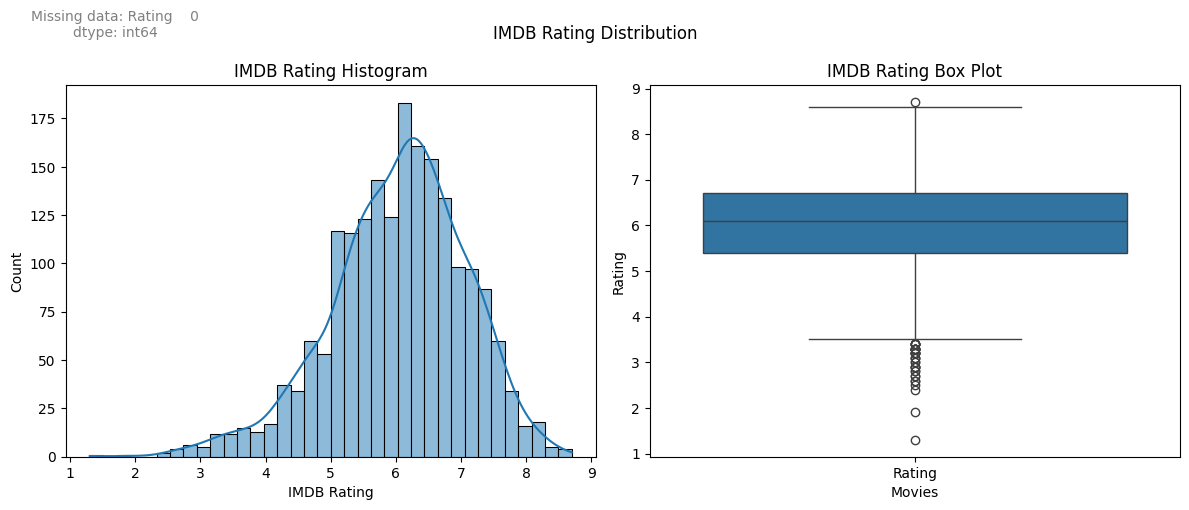

In [266]:
show_rating_distribution(y_train)

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Figure *x* shows us the distribution of IMDb Ratings. We can see that it is approximately normal, albeit with some skewness towards the left. There are also outlying values. However, as they fall within the valid values for IMDb Ratings, there is no sufficient reason to conclude that these are erroneous. We can then move on to the target features.

Starting with the budget. We can visualize its distribution using the tools above.

In [267]:
x_train['Budget'].describe() 

count    9.350000e+02
mean     5.182127e+07
std      6.404353e+07
min      3.000000e+01
25%      1.000000e+07
50%      2.700000e+07
75%      7.000000e+07
max      5.330000e+08
Name: Budget, dtype: float64

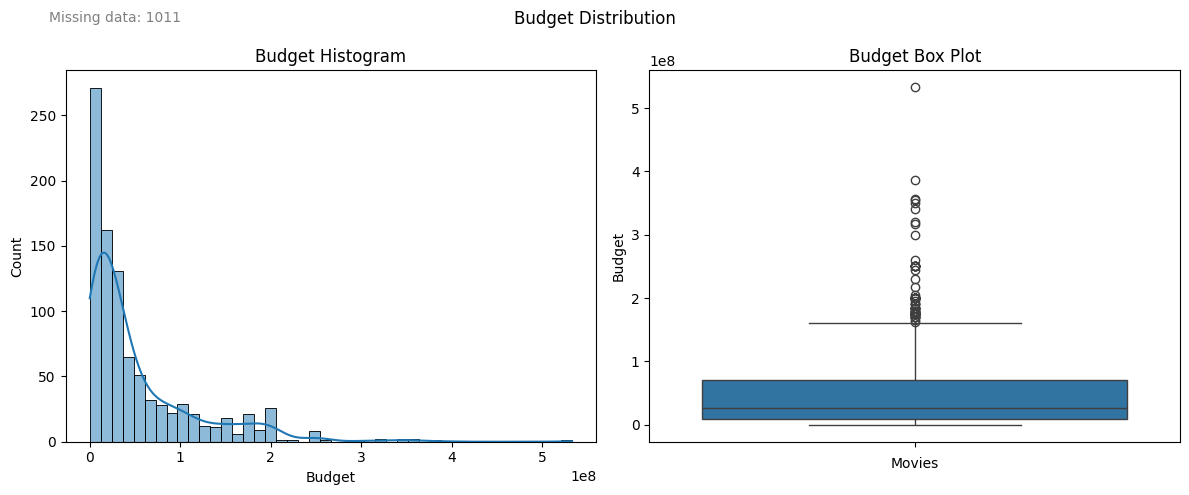

In [268]:
show_budget_hist(x_train['Budget'])

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

We can see that the budget is highly skewed. Outlying movies are skewing the distribution with a large budget. We can quickly investigate these outliers to see if they are potentially erroneous. Another essential thing to note is that this variable has over 1300 missing data points. Another observation is that 50% of the movie lie in the narrow range between 9,000,000 to 24,000,000.


In [269]:
# Calculate quartiles and IQR
Q1 = x_train['Budget'].quantile(0.25)
Q3 = x_train['Budget'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers_iqr = x_train[(x_train['Budget'] < lower_bound) | (x_train['Budget'] > upper_bound)]
outliers_iqr.sort_values(by=['Budget']).tail(10)

,Title,Year,Budget,MPA Rating,Runtime in Minutes,aaa,aaron,abandon,abandoned,abandoning,...,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war
1631,1. The Lion King,2019,260000000.0,2.0,118,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1287,3. Solo: A Star Wars Story,2018,300000000.0,3.0,135,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1164,3. Star Wars: Episode VIII - The Last Jedi,2017,317000000.0,3.0,152,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1260,1. Avengers: Infinity War,2018,321000000.0,3.0,149,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2768,2. Fast X,2023,340000000.0,3.0,141,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2643,2. Avatar: The Way of Water,2022,350000000.0,3.0,192,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2770,4. The Little Mermaid,2023,355100000.0,2.0,135,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1557,1. Avengers: Endgame,2019,356000000.0,3.0,181,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2772,6. Indiana Jones and the Dial of Destiny,2023,387200000.0,3.0,154,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
573,3. Star Wars: Episode VII - The Force Awakens,2015,533000000.0,3.0,138,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
x_train.loc[2770, 'Budget'] = 40_000_000
x_train.loc[573, 'Budget'] = 245_000_000
x_train.loc[669, 'Budget'] = 30_000_000

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

After informally checking with the actual IMDb page, the following budgets were found to be erroneous:
- The Little Mermaid (actual is 40,000,000)
- Star Wars: Episode VII - The Force Awakens (actual is 245,000,000)
- Pee-wee's Big Holiday (actual is 30,000,000)
    
The same analysis was done on the test data, but no erroneous data were found. The next feature is the MPA Rating.


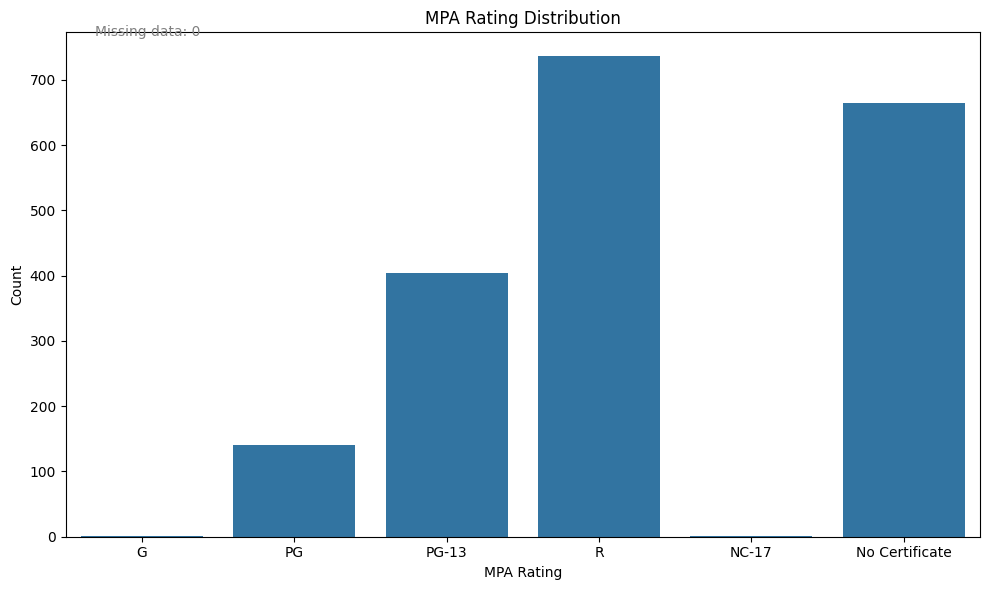

In [271]:
show_mpa_hist(x_train['MPA Rating'])

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

An interesting pattern arises from the MPA Ratings. The more exclusive ratings tend to have more films under them---except for NC-17. This makes sense, considering that many theaters flat-out refuse to show movies under that [classification](https://www.vox.com/culture/2018/10/29/18037982/mpaa-r-rating-report-50-years-criticism).

We now move on to the Runtime Distribution.

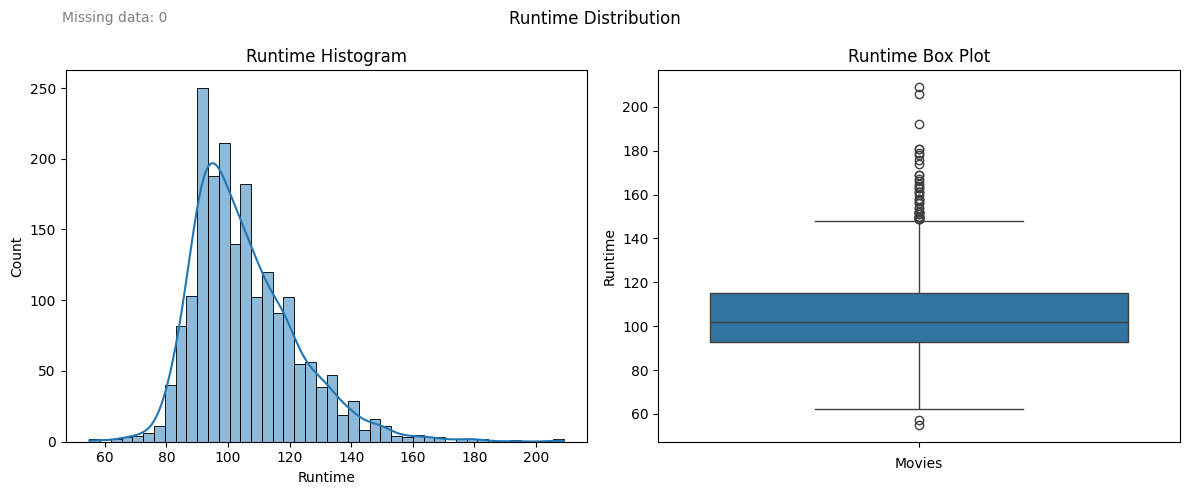

In [272]:
show_runtime_distribution(x_train['Runtime in Minutes'])

In [273]:
# Calculate quartiles and IQR
Q1 = x_train['Runtime in Minutes'].quantile(0.25)
Q3 = x_train['Runtime in Minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers_iqr = x_train[(x_train['Runtime in Minutes'] < lower_bound) | (x_train['Runtime in Minutes'] > upper_bound)]
outliers_iqr.sort_values(by=['Runtime in Minutes']).tail(1)

,Title,Year,Budget,MPA Rating,Runtime in Minutes,aaa,aaron,abandon,abandoned,abandoning,...,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war
1681,2. The Irishman,2019,159000000.0,4.0,209,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

We can see a slight skew in the distribution of the runtime. We can see very outliers with very high runtimes. However, we can confirm that these runtimes are possible by looking at the maximum data point. Zack Snyder's Justice League is famously (or infamously) over 4 hours long.

We then move on to the comma-delimited values.

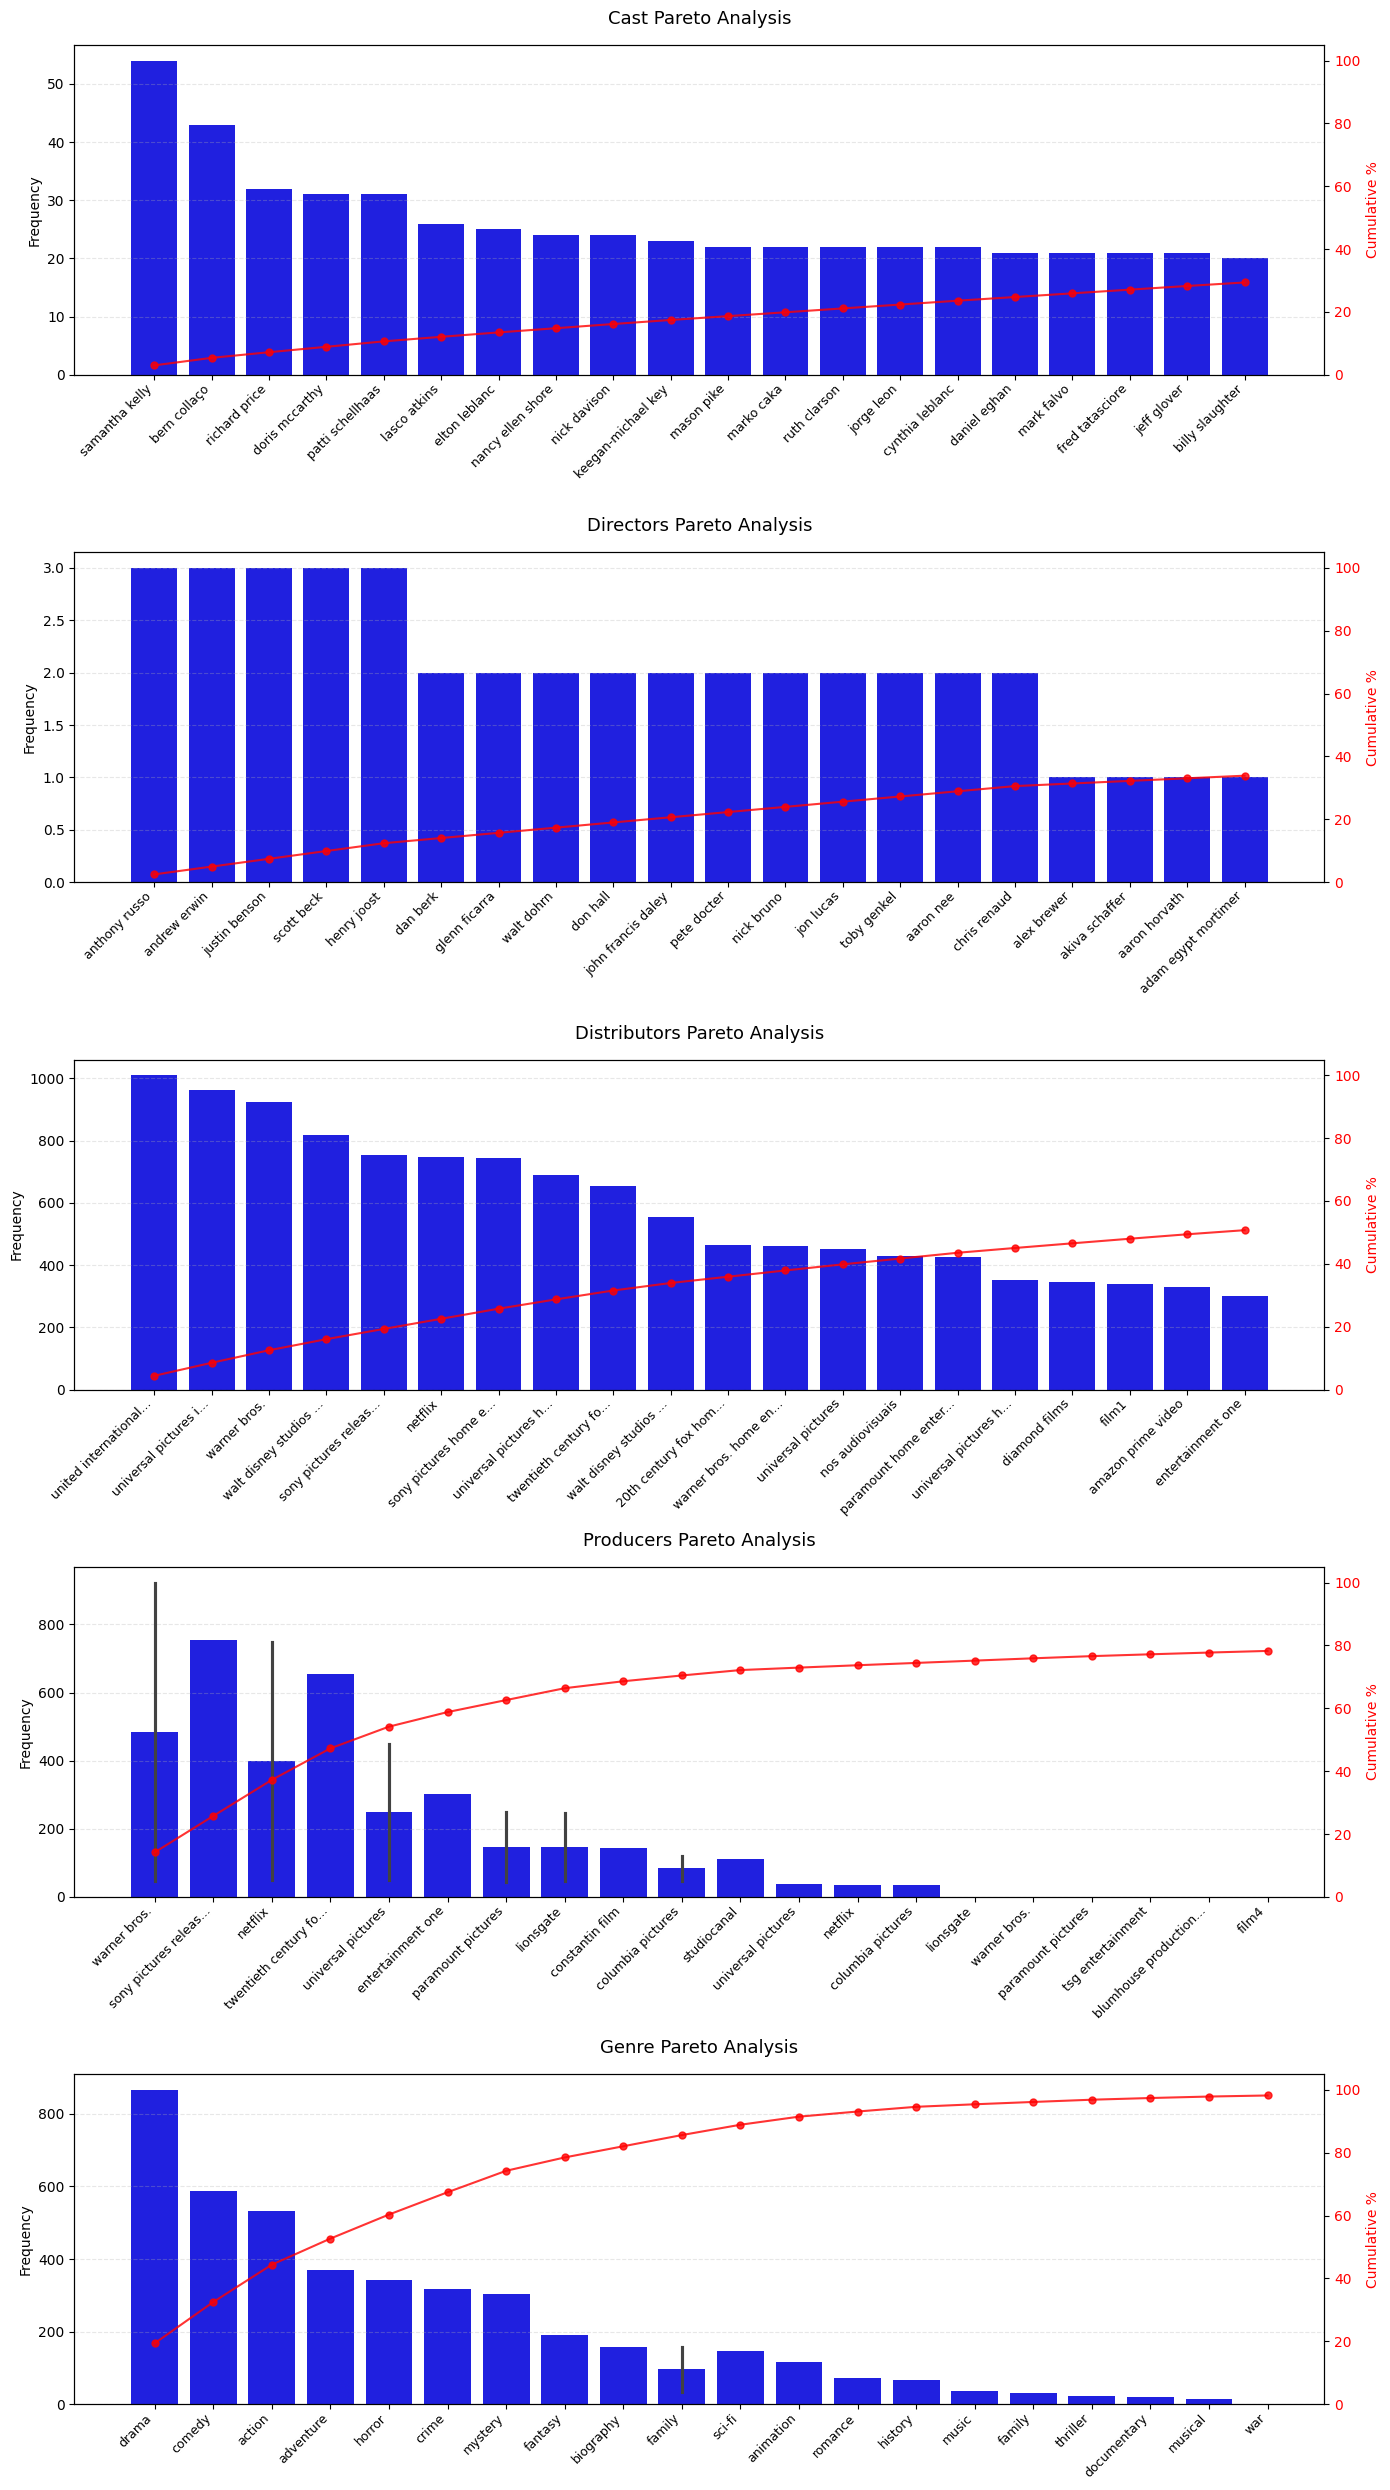

In [274]:
plot_pareto_charts(x_train, feature_dict)

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

From the Pareto plots above, we can see the relative distributions of each categorical feature. Cast and Directors are pretty diverse, with the top 20 only making just above 30% of the total appearances. Conversely, distributors and producers tend to have much more concentrated frequencies. We can see that the top 20 distributors account for half of the distributions, while the top 20 production companies account for 80% of the films.

Now, we move on to our summary feature. To visualize the relative importance of the tokens, we can use a word cloud. The size of the word is proportional to its average TF-IDF value.

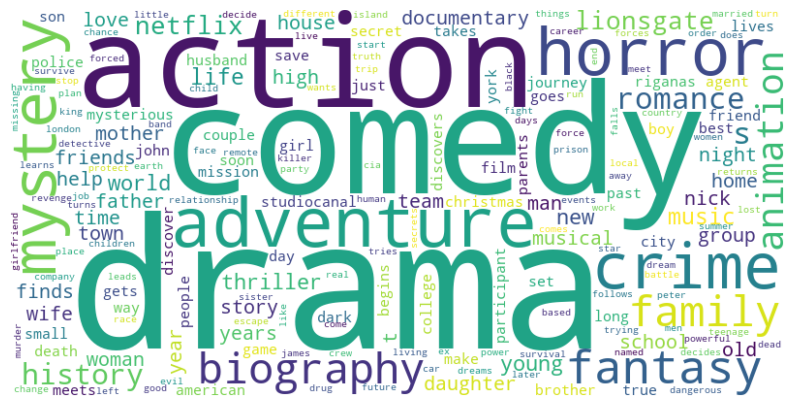

In [275]:
show_token_distribution(x_train[feature_dict['tokens']])

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

We can see clearly from Figure *x* that the words corresponding to genres are prominent in plot summaries. Words like 'drama,' 'comedy,' and 'action' are examples of this. Given that we already have a feature that accounts for the genre, this may suggest further preprocessing is needed.

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Data Transformations
Guided by the EDA, we can now transform the data before training. The first transformation we will do is to turn the 'Ratings' feature into a categorical variable. The rationale behind this transformation is to turn the problem into a classification problem. We use the median to classify the movies into 'good' (above the median) and 'bad' (below the median). This makes our interpretation easier, and it gives us balanced classes.

In [276]:
%run eda2.ipynb

Successfully Imported



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [277]:
# Calculate dynamic bin edges
min_val = y_train['Rating'].min()
max_val = y_train['Rating'].max()
q1 = y_train['Rating'].quantile(0.25)
q2 = y_train['Rating'].quantile(0.50)
q3 = y_train['Rating'].quantile(0.75)

# Create bins with these values
bins = [min_val, q2, max_val]

# Use pd.cut to assign categorical labels based on the computed bins
y_train['Rating'] = pd.cut(
    y_train['Rating'],
    bins=bins,
    labels=['bad','good'],
    include_lowest=True
)

y_val['Rating'] = pd.cut(
    y_val['Rating'],
    bins=bins,
    labels=['bad','good'],
    include_lowest=True
)

y_test['Rating'] = pd.cut(
    y_test['Rating'],
    bins=bins,
    labels=['bad','good'],
    include_lowest=True
)

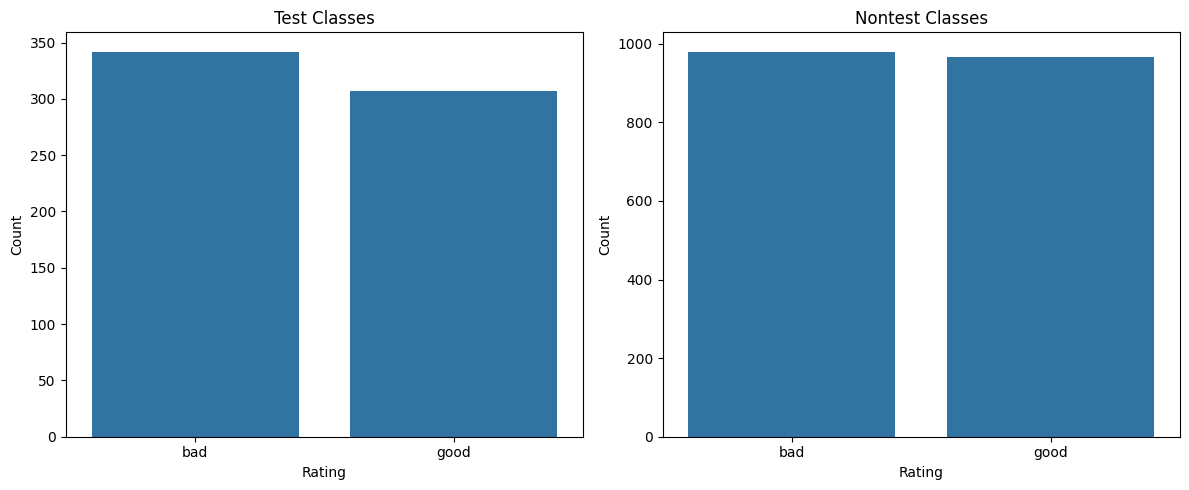

In [278]:
plot_two_countplots(y_test, y_train)

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

This gives us two relatively balanced classes.
    
Moving on to the predictors, we can reduce the dimensionality of the sparse TF-IDF vectors by doing a Principal Component Analysis.

In [279]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
tokens = feature_dict['tokens']

# Initialize PCA with the variance threshold
pca = PCA()

# Fit PCA on the scaled non-test data
pca.fit(x_train[tokens])

# Transform both non-test and test data using the fitted PCA
x_train_pca = pca.transform(x_train[tokens])
x_val_pca = pca.transform(x_val[tokens])
x_test_pca = pca.transform(x_test[tokens])

# Generate names for the principal components
pca_columns = [f'PC{i+1}' for i in range(x_train_pca.shape[1])]

# Replace original features with PCA components in the DataFrames
x_train_copy = x_train.copy()


x_train = pd.concat([
    x_train.drop(columns=tokens),
    pd.DataFrame(x_train_pca, columns=pca_columns, index=x_train.index)
], axis=1)

x_val = pd.concat([
    x_val.drop(columns=tokens),
    pd.DataFrame(x_val_pca, columns=pca_columns, index=x_val.index)
], axis=1)

x_test = pd.concat([
    x_test.drop(columns=tokens),
    pd.DataFrame(x_test_pca, columns=pca_columns, index=x_test.index)
], axis=1)

feature_dict['PCS'] = pca_columns

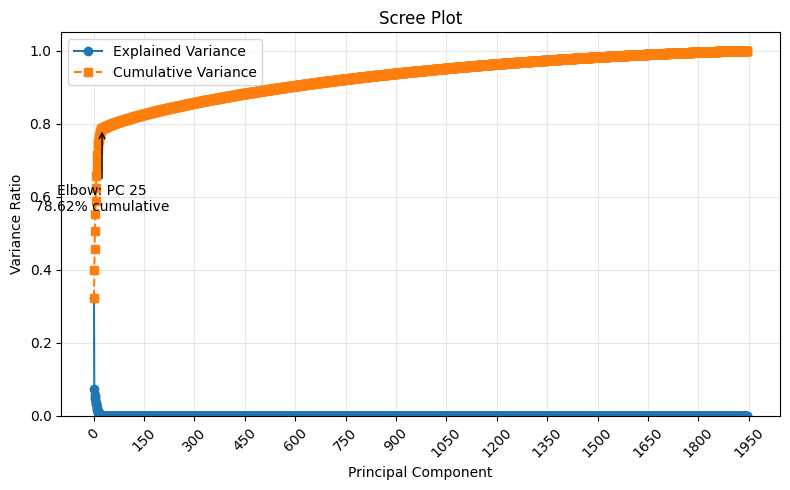

(np.int64(25), np.float64(0.7861954731985834))

In [280]:
plot_scree(pca)

In [281]:
x_train.drop(x_train[feature_dict['PCS']].columns[25:], axis=1, inplace=True)
x_val.drop(x_val[feature_dict['PCS']].columns[25:], axis=1, inplace=True)
x_test.drop(x_test[feature_dict['PCS']].columns[25:], axis=1, inplace=True)

In [282]:
feature_dict['PCS'] = pca_columns[:25]

In [283]:
x_train.head(2)

,Title,Year,Budget,MPA Rating,Runtime in Minutes,adam sandler,alison brie,arnold montey,attila g. kerekes,bern collaço,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
2186,20. The Retreat,2021,NaN,6.0,82,0,0,0,0,0,...,0.005585,-0.003183,-0.025976,-0.006093,-0.001766,-0.027307,-0.000221,-0.009084,0.001949,-0.070208
902,10. A Ghost Story,2017,150000.0,4.0,92,0,0,0,0,0,...,-0.061466,0.044401,-0.012264,-0.072072,0.013660,-0.008280,-0.038293,0.004605,-0.004730,0.039570


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

We can see that the first 25 principal components are able to capture 78% of the variance in the original plot summary space. We can drop the rest of the PCs in order to reduce the dimensionality of our data.

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

We then move to the budget. We have already cleaned this, but we still have the problem of the missing values. Additionally, given the timescale of the data, we need to account for inflation. Thankfully, we have already scraped the data from World Bank data. Using 2015 as our base year (since this is the base year of the US data), we can compute the deflated budget as follows:

$$
\text{Real Price}_t = \text{Nominal Price}_t \times \frac{\text{Index}_{2015}}{\text{Index}_t}
$$

The data is missing for 2024. However, since prices don't change much over shorter periods, we can approximate the 2024 deflator with the 2023 one.

In [284]:
deflators = pd.read_csv('deflators.csv')
deflators = deflators.drop(columns=["Unnamed: 0", "Country Name", "Country Code", "Indicator Name", "Indicator Code", "Unnamed: 69"])

# Reshape deflators to have years as rows (assuming deflators has one row)
deflators_series = deflators.T.squeeze()
deflators_series.index = deflators_series.index.astype(int)  # Convert index to integer for matching
deflators_series[2024] = deflators_series[2023]

# Calculate adjusted budget
adjusted = x_train["Budget"] * deflators_series[2015] / x_train["Year"].map(deflators_series)
x_train["Budget"] =  adjusted

adjusted = x_val["Budget"] * deflators_series[2015] / x_val["Year"].map(deflators_series)
x_val["Budget"] =  adjusted

adjusted = x_test["Budget"] * deflators_series[2015] / x_test["Year"].map(deflators_series)
x_test["Budget"] =  adjusted

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

This gives us the following distribution.

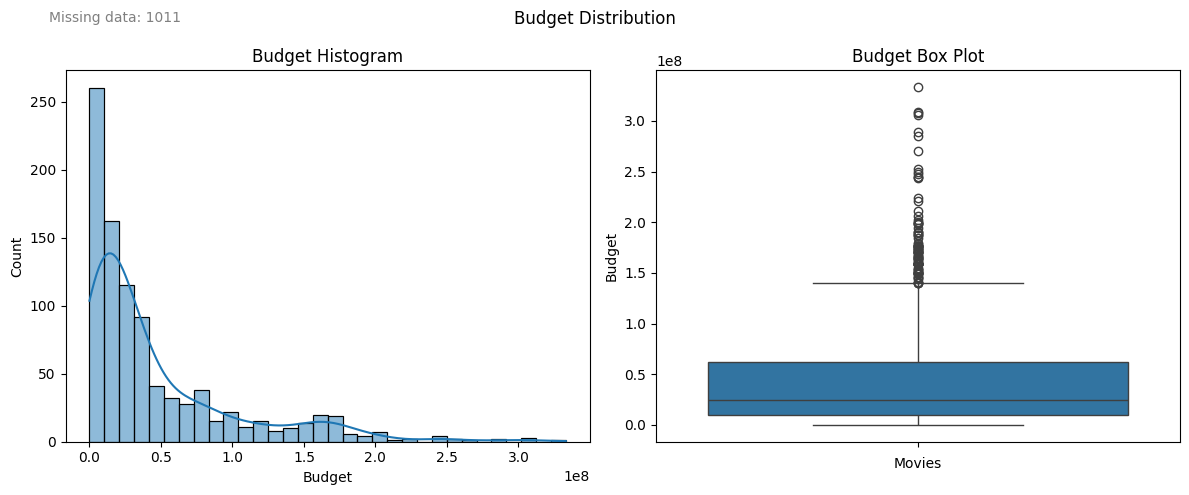

In [285]:
show_budget_hist(x_train['Budget'])

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

As the budget data is still skewed, we could impute the budget using the median. However, this would significantly skew the average if we did standard scaling later. We will transform it to match our target feature. We use the quartiles of the non-imputed data to determine the bins. These correspond to levels of budget. We then impute using the median and transform the feature into an ordinal feature through mapping.

In [286]:
# Calculate dynamic bin edges
min_val = x_train['Budget'].min()
max_val = np.inf
q1 = x_train['Budget'].quantile(0.25)
q2 = x_train['Budget'].quantile(0.50)
q3 = x_train['Budget'].quantile(0.75)

# Create bins with these values
bins = [min_val, q1, q2, q3, max_val]
median = x_train['Budget'].median()
x_train['Budget'] = x_train['Budget'].fillna(median)
x_val['Budget'] = x_val['Budget'].fillna(median)
x_test['Budget'] = x_test['Budget'].fillna(median)

# Use pd.cut to assign categorical labels based on the computed bins
x_train['Budget'] = pd.cut(
    x_train['Budget'],
    bins=bins,
    labels=[1,2,3,4],
    include_lowest=True
)

x_val['Budget'] = pd.cut(
    x_val['Budget'],
    bins=bins,
    labels=[1,2,3,4],
    include_lowest=True
)

x_test['Budget'] = pd.cut(
    x_test['Budget'],
    bins=bins,
    labels=[1,2,3,4],
    include_lowest=True
)

x_train

,Title,Year,Budget,MPA Rating,Runtime in Minutes,adam sandler,alison brie,arnold montey,attila g. kerekes,bern collaço,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
2186,20. The Retreat,2021,2,6.0,82,0,0,0,0,0,...,0.005585,-0.003183,-0.025976,-0.006093,-0.001766,-0.027307,-0.000221,-0.009084,0.001949,-0.070208
902,10. A Ghost Story,2017,1,4.0,92,0,0,0,0,0,...,-0.061466,0.044401,-0.012264,-0.072072,0.013660,-0.008280,-0.038293,0.004605,-0.004730,0.039570
2086,19. Music,2021,2,3.0,107,0,0,0,0,0,...,0.018525,0.007619,-0.006638,0.153705,0.013008,-0.030515,0.998214,0.012668,-0.143966,0.082473
285,14. The Pyramid,2014,1,4.0,89,0,0,0,0,0,...,-0.005316,0.012150,-0.010934,-0.047073,0.030079,-0.010149,0.001484,0.016110,-0.143448,-0.035637
53,4. Noah,2014,4,3.0,138,0,0,0,0,0,...,-0.003092,-0.050917,-0.017906,0.021064,-0.034471,-0.029295,0.003846,0.006956,-0.006427,0.041106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,10. Late Night,2019,1,4.0,102,0,0,0,0,0,...,-0.052499,-0.034622,0.004602,-0.023304,0.008923,-0.026602,-0.013801,-0.001325,-0.008564,-0.000417
817,22. The Belko Experiment,2016,1,4.0,89,0,0,0,0,0,...,0.010205,-0.000470,-0.028043,-0.010175,-0.003993,-0.023002,0.003714,-0.005998,-0.002640,-0.037028
1911,15. One Night in Bangkok,2020,1,4.0,105,0,0,0,0,0,...,-0.010625,0.019685,-0.151166,-0.028898,-0.072880,0.022189,0.006351,-0.026237,0.003290,-0.025485
1040,24. OtherLife,2017,2,6.0,96,0,0,0,0,0,...,-0.053541,-0.022289,-0.020460,-0.010332,-0.019478,-0.006118,-0.016087,-0.000303,-0.015592,-0.010843


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Finally, we scale the Runtime in Minutes since it is in a very different scale from the rest of the features. Since this feature is skewed to the right, we do a log transformation:

In [287]:
x_train['Runtime in Minutes'] = np.log(x_train['Runtime in Minutes'])
x_val['Runtime in Minutes'] = np.log(x_val['Runtime in Minutes'])
x_test['Runtime in Minutes'] = np.log(x_test['Runtime in Minutes'])

In [288]:
from sklearn.preprocessing import StandardScaler
#Scaler, use either Standard or Min Max
#Cuztomizable
Scaler = StandardScaler()

#Scale the data using the scaler
#We make sure not to use the test set
#to avoid data leakage
Scaler = Scaler.fit(x_train[['Runtime in Minutes']])
x_train[['Runtime in Minutes']] = Scaler.transform(x_train[['Runtime in Minutes']])
x_val[['Runtime in Minutes']] = Scaler.transform(x_val[['Runtime in Minutes']])
x_test[['Runtime in Minutes']] = Scaler.transform(x_test[['Runtime in Minutes']])

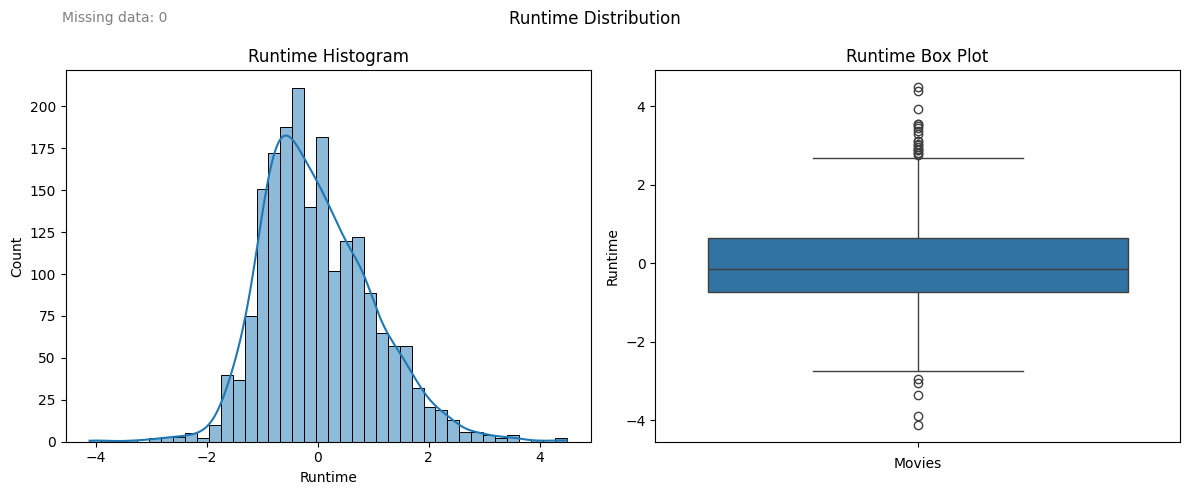

In [289]:
show_runtime_distribution(x_train['Runtime in Minutes'])

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The log transformation normalized the feature and made the magnitudes more similar to the other features. Finally, we drop non-essential features like Title and Year.

In [290]:
x_train = x_train.drop(columns=['Title', 'Year'])
x_val = x_val.drop(columns=['Title', 'Year'])
x_test = x_test.drop(columns=['Title', 'Year'])

In [291]:
x_train.tail(2)

,Budget,MPA Rating,Runtime in Minutes,adam sandler,alison brie,arnold montey,attila g. kerekes,bern collaço,bernardo santos,billy slaughter,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
1040,2,6.0,-0.523702,0,0,0,0,0,0,0,...,-0.053541,-0.022289,-0.020460,-0.010332,-0.019478,-0.006118,-0.016087,-0.000303,-0.015592,-0.010843
643,2,6.0,-0.260727,0,0,0,0,0,0,0,...,-0.022376,-0.018576,0.001817,-0.025243,0.030343,-0.014297,-0.003284,0.001872,-0.002401,-0.082695


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Model Training
We start by splitting our nontest data into a train and validation tests. The train test trains the model's parameters, while the validation is used for the hyperparameter tuning.

In [292]:
Classifiers = {}
Hyperparams = {}

# Ensure target values are properly formatted
y_train = y_train[target].values.ravel()
y_test = y_test[target].values.ravel()
y_val = y_val[target].values.ravel()

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

**KNN** classifies the data based on its k-nearest neighbors. We handle hyperparameter tuning by iterating over the possible values of k. We employ early stopping, wherein we stop searching once the validation accuracy fails to improve consecutively after 10 searches.

In [293]:
# Controls the early stopping
# Customizable 
# + Increase this to increase the possible search space
# - Decrease this if taking too long
patience = 10


#Recording Variables
scores = [0]
k_searched = 0
current_patience = patience

for k in range(1,len(x_train)):
    # Instantiate the model
    reg = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    reg.fit(x_train, y_train)

    score = reg.score(x_val, y_val)

    if score <= scores[-1]:
        current_patience -= 1
    else:
        current_patience = patience

    if current_patience <= 0:
        break

    scores.append(score)
    k_searched += 1

best_k = np.argmax(scores)
print(f"{best_k=}")

# KNN Regressor
KNNclass = sklearn.neighbors.KNeighborsClassifier(n_neighbors=best_k)
KNNclass.fit(x_train, y_train)
Classifiers["KNN Classifier"] = KNNclass
Hyperparams["KNN Classifier"] = f"{best_k=}"

best_k=np.int64(21)


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The next two are linear classifiers. We employ a similar hyperparameter tuning as above. However, our search is logarithmic and unbounded (in one direction).

In [294]:
# Controls the early stopping
# Customizable 
# + Increase this to increase the possible search space
# - Decrease this if taking too long
patience = 5
scores = [0]
c_searched = [0]

current_patience = patience
c = 2 ** (-5)

while current_patience > 0:
    # Instantiate the model
    reg = sklearn.linear_model.LogisticRegression(C=c, max_iter=100000)
    
    # Fit the model
    reg.fit(x_train, y_train)

    score = reg.score(x_val, y_val)

    if score <= scores[-1]:
        current_patience -= 1
    else:
        current_patience = patience

    scores.append(score)
    c_searched.append(c)

    c *= 2
    

#calculate alpha based on index of best score
best_c = 2.0 ** (np.argmax(scores)-6) 
print(f"{best_c=}")

# KNN Regressor
Ridgereg = sklearn.linear_model.LogisticRegression(C=best_c)
Ridgereg.fit(x_train, y_train)
Classifiers["Logistic Regression (L2)"] = Ridgereg
Hyperparams["Logistic Regression (L2)"] = f"{best_c=}"

best_c=np.float64(0.03125)


In [295]:
# Controls the early stopping
# Customizable 
# + Increase this to increase the possible search space
# - Decrease this if taking too long
patience = 10

scores = [0]
c_searched = [0]

current_patience = patience
c = 2 ** (-5)
while current_patience > 0:
    # Instantiate the model
    reg = sklearn.svm.LinearSVC(C=c, penalty="l2")
    
    # Fit the model
    reg.fit(x_train, y_train)

    score = reg.score(x_val, y_val)

    if score <= scores[-1]:
        current_patience -= 1
    else:
        current_patience = patience

    scores.append(score)
    c_searched.append(c)

    c *= 2

#calculate alpha based on index of best score
best_c = 2.0 ** (np.argmax(scores)-6) 
print(f"{best_c=}")

# KNN Regressor
Ridgereg = sklearn.svm.LinearSVC(C=best_c, penalty="l2")
Ridgereg.fit(x_train, y_train)
Classifiers["SVM (L2)"] = Ridgereg
Hyperparams["SVM (L2)"] = f"{best_c=}"

best_c=np.float64(0.0625)


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

The next are tree-based, ensemble methods.

In [296]:
rf = sklearn.ensemble.RandomForestClassifier(random_state=42, n_estimators=1000, max_depth = 3)
rf.fit(x_train, y_train)

Classifiers["RF"] = rf
Hyperparams["RF"] = 'nuh'


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Model Evaluation
We start by listing the accuracies of each model. We will take note of the ones with the highest validation accuracy.

In [297]:
model_performances = pd.DataFrame(columns = ["Classifier", "Train Score", "Test Score", "Validation Score" , "Hyperparams"])


for classifier in Classifiers:
    train_score = f"{Classifiers[classifier].score(x_train, y_train):.2%}"
    test_score = f"{Classifiers[classifier].score(x_test, y_test): .2%}"
    val_score = f"{Classifiers[classifier].score(x_val, y_val): .2%}"
    hp = Hyperparams.get(classifier)
    model_performances.loc[len(model_performances)] = [classifier, train_score, test_score, val_score, hp]

model_performances.sort_values(by=["Validation Score"], ascending=False)


,Classifier,Train Score,Test Score,Validation Score,Hyperparams
1,Logistic Regression (L2),75.69%,71.80%,71.65%,best_c=np.float64(0.03125)
2,SVM (L2),79.14%,70.57%,71.49%,best_c=np.float64(0.0625)
3,RF,73.28%,68.57%,71.03%,nuh
0,KNN Classifier,69.99%,64.56%,70.57%,best_k=np.int64(21)


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Here, Logistic Regression (L2) has the highest validation score. Of course, accuracy by itself is insufficient to gauge the model's performance. We can look at the other performance matrices to see our model performance.

In [312]:
from sklearn.metrics import f1_score, recall_score, precision_score

# NEW DataFrame with ONLY validation metrics
val_metrics = pd.DataFrame(columns=[
    "Classifier",
    "Validation Score",  # Accuracy
    "Val F1",           # F1-score
    "Val Recall",       # Recall
    "Val Precision",    # Precision
    "Hyperparams"
])

for classifier in Classifiers:
    # Get predictions for validation set
    y_val_pred = Classifiers[classifier].predict(x_val)
    
    # Calculate validation metrics
    val_score = f"{Classifiers[classifier].score(x_val, y_val):.2%}"  # Accuracy
    val_f1 = f"{f1_score(y_val, y_val_pred, average='binary', pos_label='good'):.2%}"
    val_recall = f"{recall_score(y_val, y_val_pred, average='binary', pos_label='good'):.2%}"
    val_precision = f"{precision_score(y_val, y_val_pred, average='binary',  pos_label='good'):.2%}"
    
    hp = Hyperparams.get(classifier)
    
    val_metrics.loc[len(val_metrics)] = [
        classifier,
        val_score,
        val_f1,
        val_recall,
        val_precision,
        hp
    ]

# Sort by Validation Score (descending)
val_metrics.sort_values(by="Validation Score", ascending=False)

,Classifier,Validation Score,Val F1,Val Recall,Val Precision,Hyperparams
1,Logistic Regression (L2),71.65%,68.71%,66.01%,71.63%,best_c=np.float64(0.03125)
2,SVM (L2),71.49%,68.80%,66.67%,71.08%,best_c=np.float64(0.0625)
3,RF,71.03%,65.19%,57.52%,75.21%,nuh
0,KNN Classifier,70.57%,66.31%,61.44%,72.03%,best_k=np.int64(21)


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Logistic Regression leads across all metrics, followed closely by SVM. To see how these Precision and Recall values translate to prediction, we can look at the models' confusion matrices.

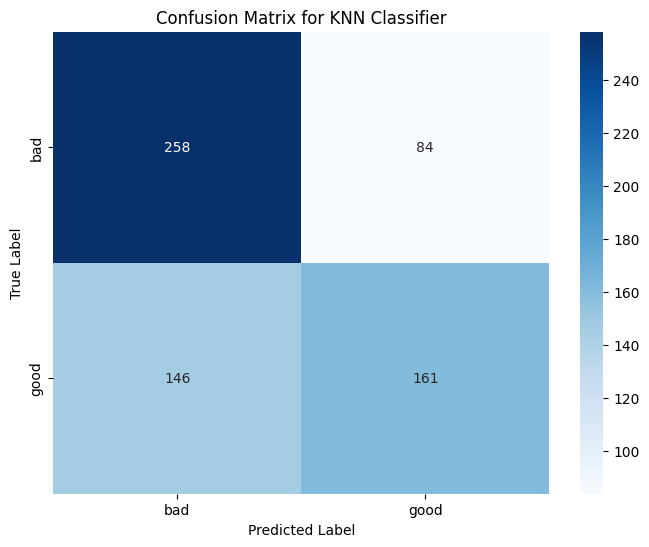

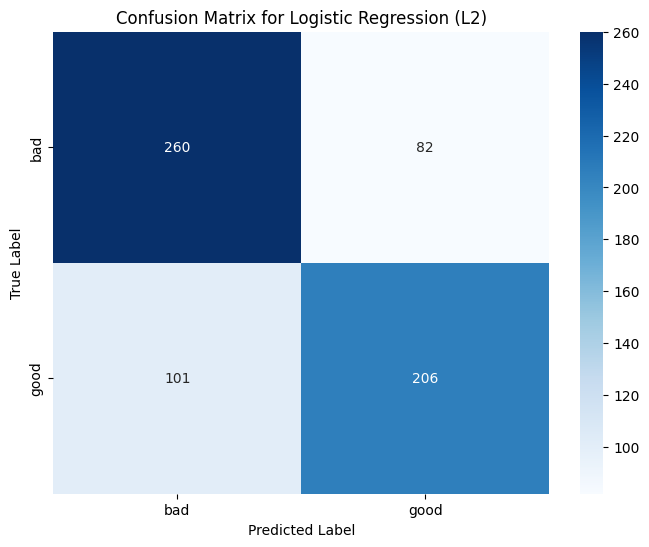

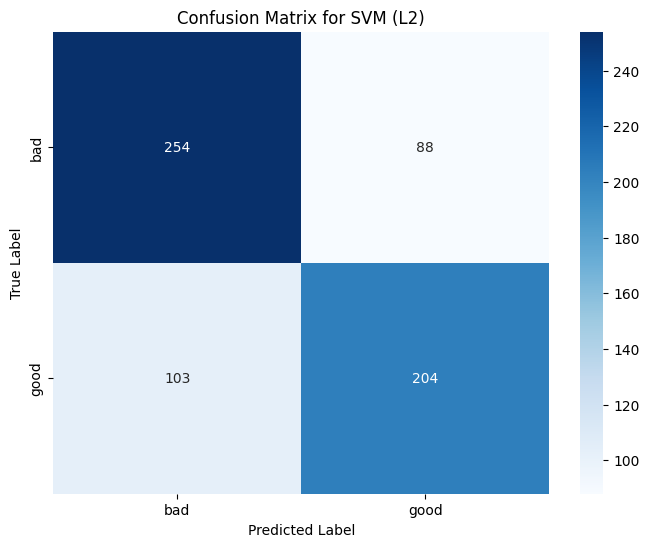

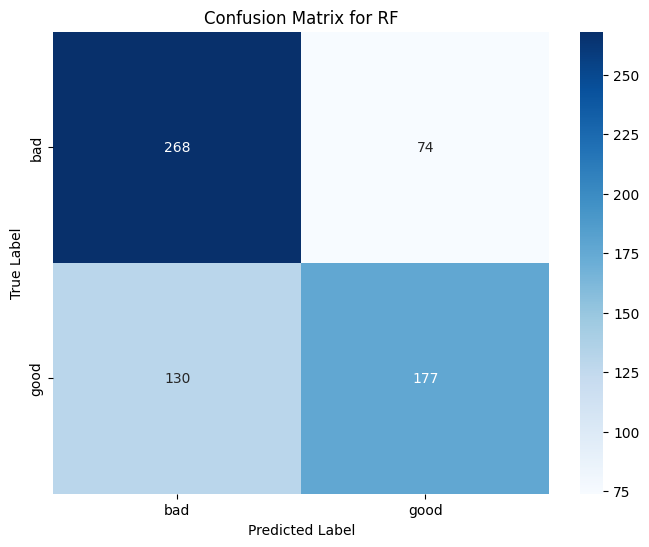

In [298]:
for classifier in Classifiers:
    model = Classifiers[classifier]
    y_pred = model.predict(x_test)
    
    # Compute the confusion matrix, specifying labels to ensure an n x n matrix
    cm = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    # Plot the confusion matrix using seaborn's heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {classifier}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

From the validation accuracies, we see that Logistic Regression (L2) performs the best. The confusion matrix for this model confirms this. The model is adequately able to classify the classes along the diagonals. However, there is a slight tendency towards predicting 'bad,' as can be seen by the greater number of 'True' good films being misclassified as bad compared to bad films being misclassified as good.

In [313]:
from sklearn.metrics import f1_score, recall_score, precision_score

# Select the specific classifier
classifier_name = 'Logistic Regression (L2)'
model = Classifiers[classifier_name]

# Get predictions for TEST set
y_test_pred = model.predict(x_test)

# Calculate metrics (using binary averaging with pos_label='good')
test_score = f"{model.score(x_test, y_test):.2%}"  # Accuracy
test_f1 = f"{f1_score(y_test, y_test_pred, average='binary', pos_label='good'):.2%}"
test_recall = f"{recall_score(y_test, y_test_pred, average='binary', pos_label='good'):.2%}"
test_precision = f"{precision_score(y_test, y_test_pred, average='binary', pos_label='good'):.2%}"

# Create a DataFrame for the results
test_metrics = pd.DataFrame({
    "Classifier": [classifier_name],
    "Test Score (Accuracy)": [test_score],
    "Test F1": [test_f1],
    "Test Recall": [test_recall],
    "Test Precision": [test_precision],
    "Hyperparams": [Hyperparams.get(classifier_name)]
})

test_metrics

,Classifier,Test Score (Accuracy),Test F1,Test Recall,Test Precision,Hyperparams
0,Logistic Regression (L2),71.80%,69.24%,67.10%,71.53%,best_c=np.float64(0.03125)


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

### Feature Importance
We can determine how the model treats its features using the weights. Since our chosen model is linear, the coefficients correspond roughly to their importance. We can start by visualizing the top 30 features by coefficient.

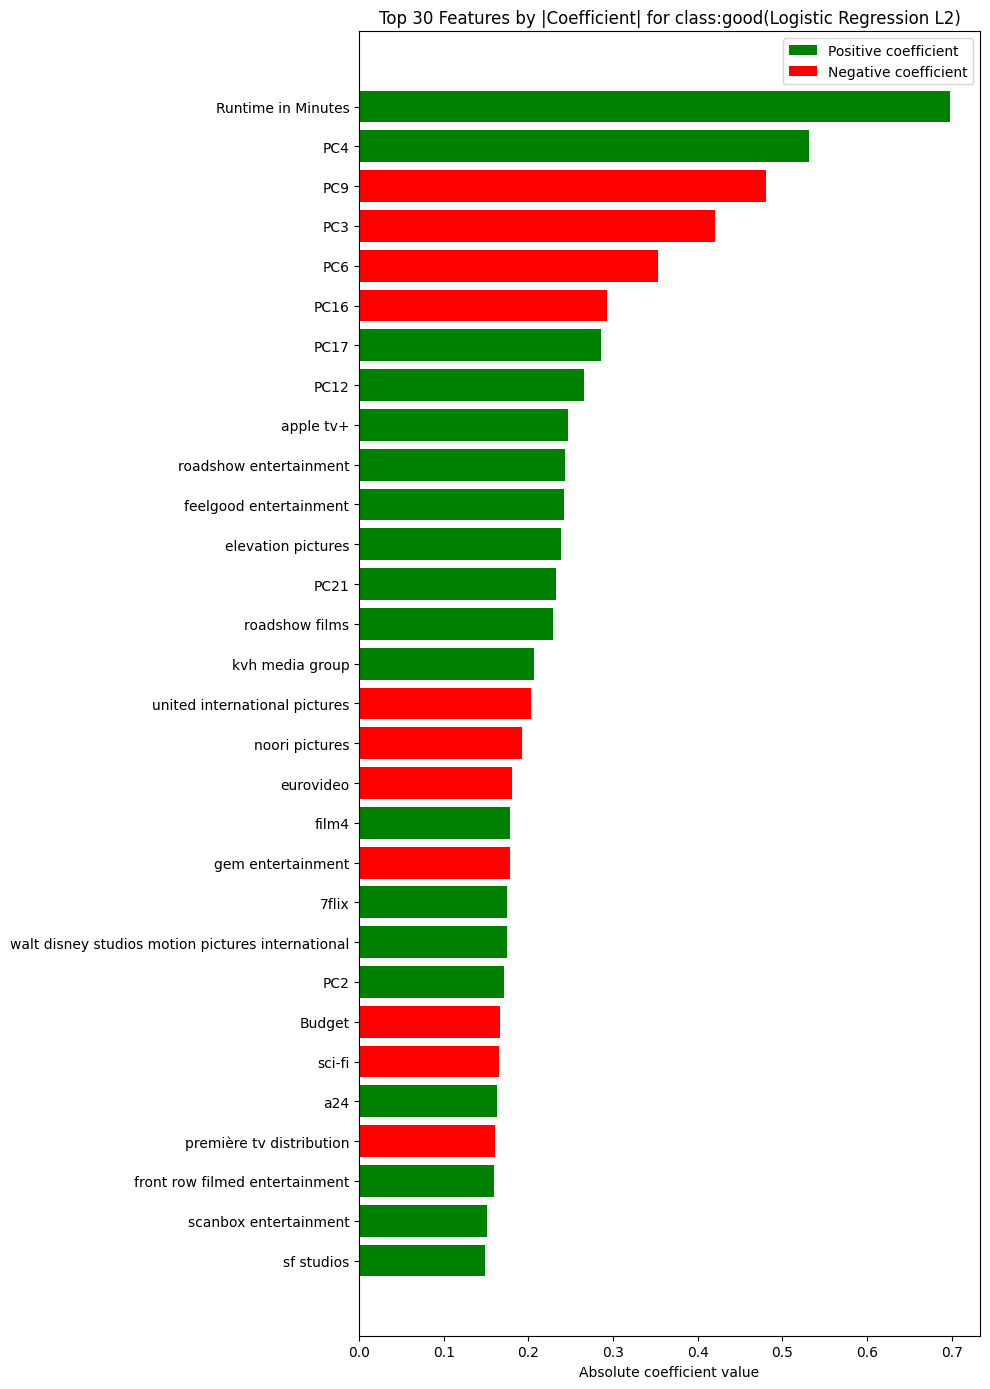

In [300]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# === CONFIGURE THIS ===
top_n      =  30         # ← pick how many features to show
horizontal = True       # ← False for vertical bars
pos_color  = 'green'
neg_color  = 'red'
# ======================

# Assume you already have:
model    = Classifiers['Logistic Regression (L2)']
features = list(x_train.columns)

# 1. Extract and rank by absolute magnitude
coefs     = model.coef_[0]
abs_coefs = np.abs(coefs)
top_idx   = np.argsort(abs_coefs)[-top_n:]
# sort top indices so the largest is first in the bar chart
sorted_idx = top_idx[np.argsort(abs_coefs[top_idx])[::-1]]

# 2. Prepare data for plotting
names       = [features[i]    for i in sorted_idx]
orig_vals   = coefs[sorted_idx]
abs_vals    = abs_coefs[sorted_idx]
bar_colors  = [pos_color if v >= 0 else neg_color for v in orig_vals]

# 3. Plot
plt.figure(figsize=(10, 0.4 * top_n + 2))

if horizontal:
    plt.barh(names, abs_vals, color=bar_colors)
    plt.gca().invert_yaxis()   # highest magnitude on top
    plt.xlabel("Absolute coefficient value")
else:
    plt.bar(names, abs_vals, color=bar_colors)
    plt.xticks(rotation=90)
    plt.ylabel("Absolute coefficient value")

# 4. Legend
legend_patches = [
    Patch(facecolor=pos_color, label="Positive coefficient"),
    Patch(facecolor=neg_color, label="Negative coefficient")
]
plt.legend(handles=legend_patches, loc='best')

class_ = model.classes_[1]

plt.title(f"Top {top_n} Features by |Coefficient| for class:{class_}(Logistic Regression L2)")
plt.tight_layout()
plt.show()


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Runtime is the top predictor in the model, followed closely by 7 Principal components. Then comes some of the producers and distributors. While some features are understandable, the principal components are more complex to interpret. We can visualize some of these principal components using a biplot to aid in interpretation.

In [321]:
%run eda2.ipynb

Successfully Imported



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='PC4', ylabel='PC9'>)

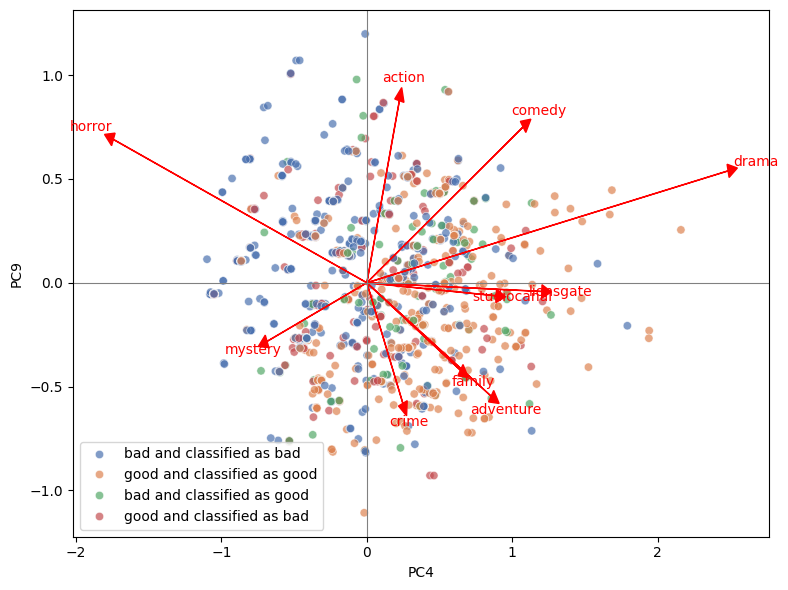

In [316]:
y_pred   = model.predict(x_train)
y_actual = y_train

y_class = [
    f"{actual} and classified as {pred}"
    for actual, pred in zip(y_actual, y_pred)
]

biplot(x_train_copy[feature_dict['tokens']], x_train[feature_dict['PCS']], feature_names=None, pc_indices=(3, 8), top_arrows=10, arrow_scale=None, figsize=(8, 6), title=None, predictions=y_class)

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='PC3', ylabel='PC16'>)

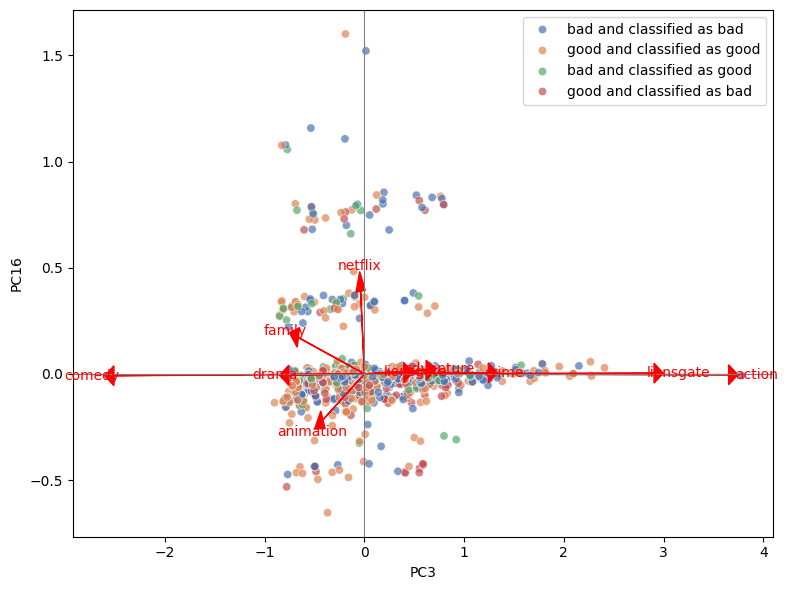

In [317]:
biplot(x_train_copy[feature_dict['tokens']], x_train[feature_dict['PCS']], feature_names=None, pc_indices=(2, 15), top_arrows=10, arrow_scale=None, figsize=(8, 6), predictions=y_class)

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

We see some distinct clustering, especially in the biplots for PC16 and PC3. However, upon labeling based on the actual and predicted class, these clusters seem unrelated to either the exact quality of the movie or how our model perceives the movie. Thus, to learn more about our model's behavior about the principal components, we can use word clouds again. This time, the size of the word is proportional to the magnitude of the vector of the transformed token in the PC space. We can still use color to show the direction of this vector.

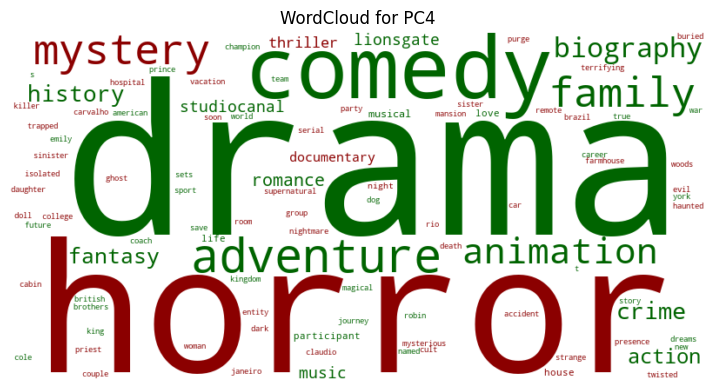

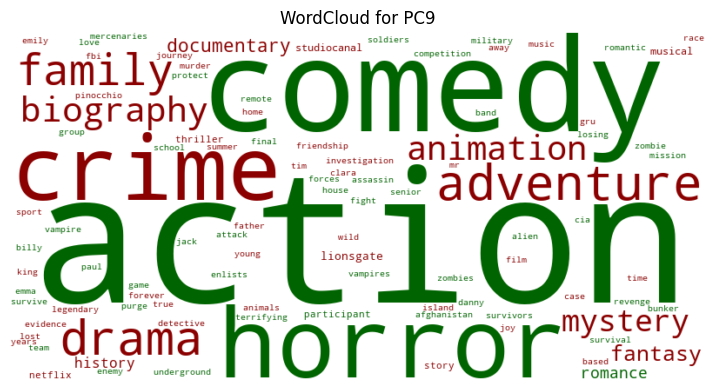

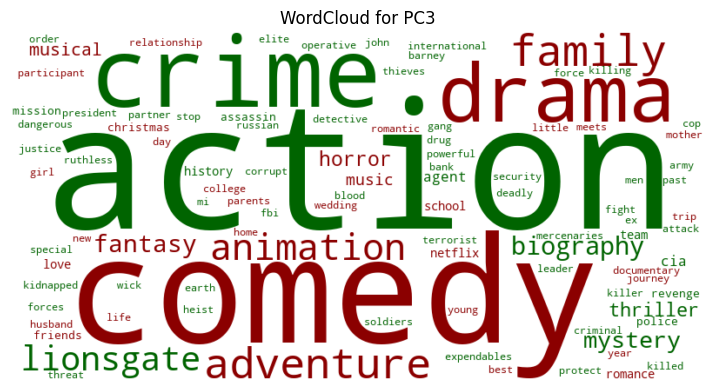

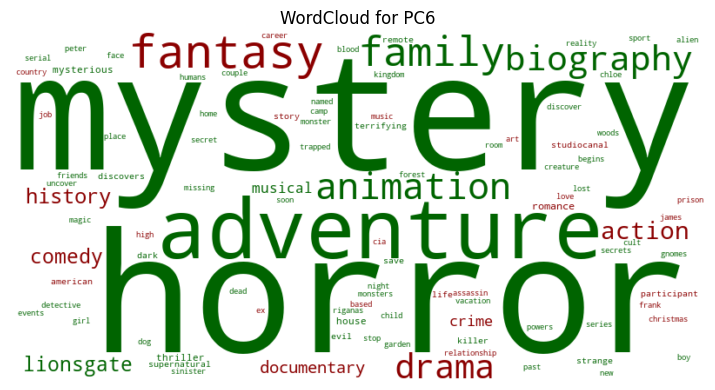

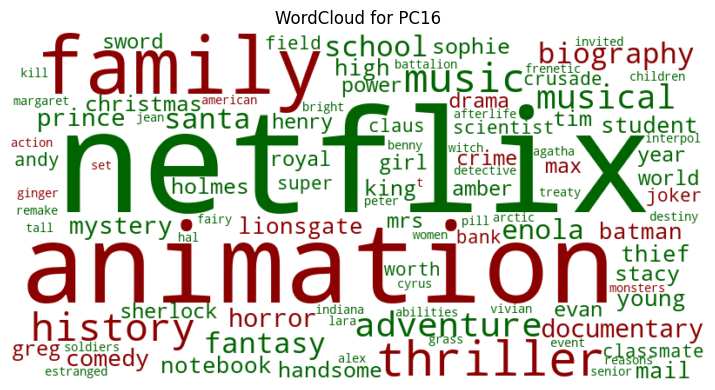

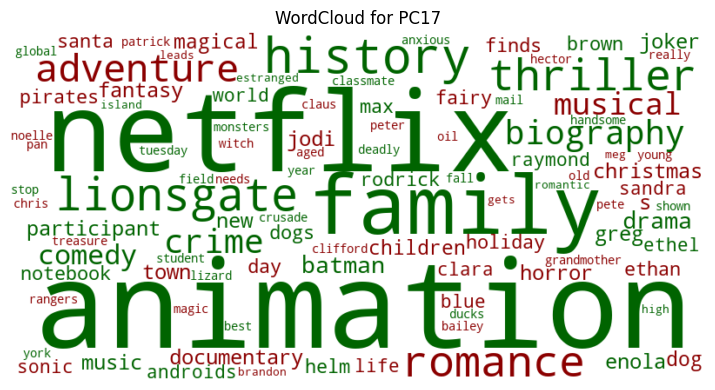

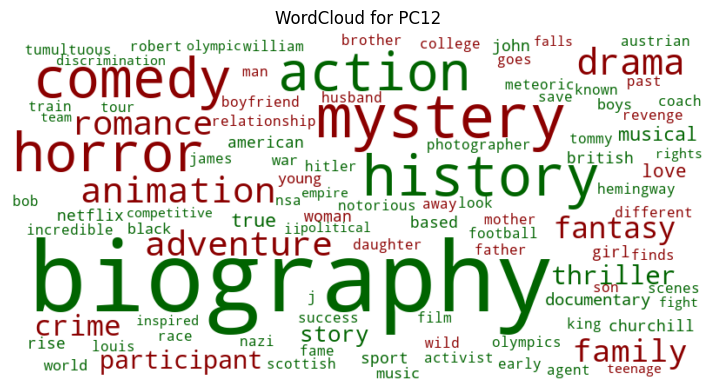

In [322]:
X_tokens = x_train_copy[feature_dict['tokens']]
pcs_scores = pca.transform(X_tokens)  
pcs = [4, 9, 3, 6, 16, 17, 12]


for pc in pcs:
    wc3, fig3, ax3 = wordcloud_pc(
        orig=X_tokens,              # your original token counts
        pcs=pcs_scores,            # the matrix of PC scores
        feature_names=None,        # will pull column names from X_tokens
        pc_index=pc-1,                # 0‐based index → PC3
        max_words=100,             
        width=800,                 
        height=400,                
        scale=1,                   
        colormap_positive='Greens',  
        colormap_negative='Reds',
        background_color='white',  
        title=f'WordCloud for PC{pc}'
    )

<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

We see that keywords that correspond to genre are prominent across the top 3 principal components. However, their directions are sometimes opposite one another.

---

<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">DISCUSSION</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

**Model Performance**

The final model can generalize to new data with up to 72% accuracy. Using the baseline of $$1.25∗PCC=62.68$$, we can conclude that the model does have some predictive power. It is also noteworthy that the linear models performed better in this task than the tree-based models. This is interesting to note as a paper by Thomal (2024), found a similar pattern while doing sentiment analysis on IMDB review ratings <a href="https://www.researchgate.net/publication/381285499_Sentiment_Analysis_of_IMDb_Movie_Reviews">[2]</a>. This could suggest that this domain is well-suited for linear models—although more research is needed to conclude or disprove this.

**Feature Importance**

Regarding the model coefficients, the runtime had the highest weights. This is quite surprising for a few reasons. From the initial EDA, the variance of this feature was very low, as can be visually seen by the very short IQR. This suggests that this feature may not be informative since the model could have difficulty distinguishing values from each other. It also had many outlying films, which skewed it towards higher runtimes. Despite these drawbacks, it seems positively associated with the rating after a log transform and standard scaling.

Another counterintuitive conclusion is the budget feature, which is negatively associated with the rating. Some studies, like those by Murschetz et al. (2023), testify to the importance of budget in Movie Quality prediction <a href="https://journals.aau.dk/index.php/NJMM/article/view/5871">[3]</a>. However, their study did not mention whether the budget is a positive or negative indicator. However, this negative association may not be as counterintuitive as it seems if we remember huge-budget films that flopped. IMDB hosts a list of high-budget films that flopped  <a href="https://www.imdb.com/list/ls052417006/">[4]</a>.

The actors and directors also failed to appear in the top 30 features. One possible reason for this is the approach by which these features were extracted. Studies like those by Bruneel et al. (2023) considered star power and director power using metrics like the number of appearances and award nominations <a href="https://journals.aau.dk/index.php/NJMM/article/view/5871/5505">[5]</a>. Our model only considers the former.

The limitation of this approach can also be seen in the distributors and producers. Despite some distributors and producers being in the top 30 essential features, these are not in the top 20 in their category regarding frequency. United International Picture is a notable exception to this, as it is in the top 30 essential features and the number one distributor in terms of frequency.

**PCA**

Finally, we move on to the principal components. Recall that these principal components correspond to the tokens in the plot summary. Looking at the biplots of the top 4 principal components, we can see some tiny 'clusters' where the points overlap. These clusters are even more distinct and separated when looking at PC3 and PC16. However, as mentioned earlier, there is a theme here that corresponds cleanly to the actual movie quality or predicted movie quality.

This leads us to the word clouds for the PCS. The most significant contributors are the keywords that correspond to the genre. This is similar to the token distribution in the initial EDA. However, each PC specializes in detecting specific binaries of genre. For example,our top predictor, PC4 seems to be measuring where a movie lies in a drama-horror continuum, suggesting that it looks into a movie's "atmosphere'. PC 9 seems to be measuring a movie's "seriousness" in terms of tone. Finally, PC3 is positively associated with "Action, Crime, Thriller" while negatively associated with "Family, Comedy, Adventure". Thus, PC3 seems to be measuring some vague notion of "Family-Friendliness".

---

<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">CONCLUSION</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<div style="border: 2px solid black; padding: 10px;text-align: justify; border-radius: 5px; max-width: 90%; margin: 0 auto;">

Ultimately, the team developed a model that can predict binary movie quality with 72% accuracy. While the features considered should not be taken as exhaustive, the model performs significantly better than chance. However, as with any artistic endeavor, filmmaking is a complex project with many dynamic features. Thus, our model is not a final decider of which movies should be produced. Instead, it should be used as an additional step in a series of screening steps.


<div style="width: 100%; box-sizing: border-box; background-color: #F5C518; color: black; padding: 10px; text-align: center; margin-bottom: 10px;">
  <h1 style="margin: 0;">REFERENCES</h1>
  <hr style="border: 0; border-top: 1px solid black; margin: 10px auto; width: 90%;">
</div>


<a id="ref1" href="https://www.imdb.com/title/tt4154796">[1] Avengers: Endgame”.IMDB. accessed April 22, 2025. https://www.imdb.com/title/tt4154796 </a>

<a id="ref1" href="https://www.researchgate.net/publication/381285499_Sentiment_Analysis_of_IMDb_Movie_Reviews">[2] Thomal, S. (2024). Sentiment analysis of IMDb movie reviews. ResearchGate. https://www.researchgate.net/publication/381285499_Sentiment_Analysis_of_IMDb_Movie_Reviews</a>

<a id="ref1" href="https://journals.aau.dk/index.php/NJMM/article/view/5871">[3] Murschetz, P. C., Teichmann, R., & Karmasin, M. (2023). Movie quality prediction: The role of budget. Nordic Journal of Media Management, 4(1), 1–15. https://journals.aau.dk/index.php/NJMM/article/view/5871</a>

<a id="ref1" href="https://www.imdb.com/list/ls052417006/">[4] Box office bombs: The biggest movie flops. (n.d.). IMDb. https://www.imdb.com/list/ls052417006/</a>

<a id="ref1" href="https://journals.aau.dk/index.php/NJMM/article/view/5871/5505">[5] Bruneel, S., et al. (2023). Star power and director power in movie success. Nordic Journal of Media Management, 4(1), 16–29. https://journals.aau.dk/index.php/NJMM/article/view/5871/5505
</a>